# EDA(Exploratory Data Analysis)
### 1.Load Datasets
### 2.Clean data(missing values,duplicates,types)
### 3.treat outliers
### 4.Univariate,Bivariate and Multivariate Analysis
### 5.Insights

#### Outlier:A datapoint that is significantly different from other observations or datapoints in a dataset.
### How outliers will come ?
#### 1.Measurement Errors
#### 2.Data Entry mistakes

### Why they are important ?
#### 1.They can be errors
#### 2.They effect the data analysis

### How to identify the outliers?
#### 1.Visualization technique
#### --->Box Plots
#### --->Scatter plots
#### ---> Histogram

#### 2.Statistical Method
#### ---->Interquartile Range(IQR)
#### ---->Z-Score

### Univariate Analysis - a method that analyzes a single variable to describe its characteristics,find patterns and summarize data.
#### It involves only one variable.

### Bivariate Analysis - It gives the relationship between two variables.It helps to discover or find if there is any correlation between the two variables and any association or any connection between the two variables.
#### It involves 2 variables (x & y)

### Multivariate Analysis - To understand how multiple factors interact and influence each other.
#### It involves more than 2 variables.
Example -
How petal length,petal width,sepal length and sepal width together influence the species classification.

### ETL(Extract Transform Load)
### ELT(Extract Load Transform)

## EDA : Iris Dataset

1. Load & Overview
2. Cleaning(missing, dupes, dtypes)
3. Uni,Bi & Multi analysis
4. Outlier - IQR
5. Feature Engineering
6. Key Insights

### Feature Engineering: 
Feature Engineering is the process of turning raw data into useful features that helps to improve the performance of machine learning models.

### 1. Load libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 2. Load Dataset

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



# Basic Information & Overview

In [3]:
print("Shape of dataset:", df.shape)
print("\n Data Info",df.info())

Shape of dataset: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 Data Info None


# Summary 

In [4]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



# Missing values Analysis

In [5]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


#### Insight: Iris dataset has no missing values.

# 4.Handling Missing values (if any)

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)
print("Missing values cleaned:",df.isnull().sum().sum())

# Duplicates & Data type check 
print("Duplicate rows:",df.duplicated().sum())

# Convert species into category type
df['species']=df['species'].astype('category')
df.info()

Missing values cleaned: 0
Duplicate rows: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB



### Univariate Analysis for Numerical Features

In [8]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


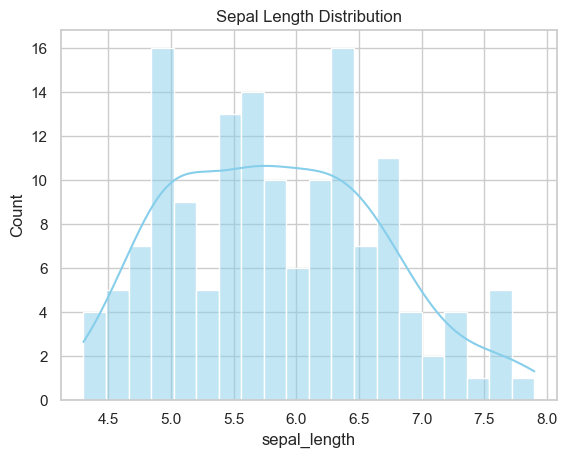

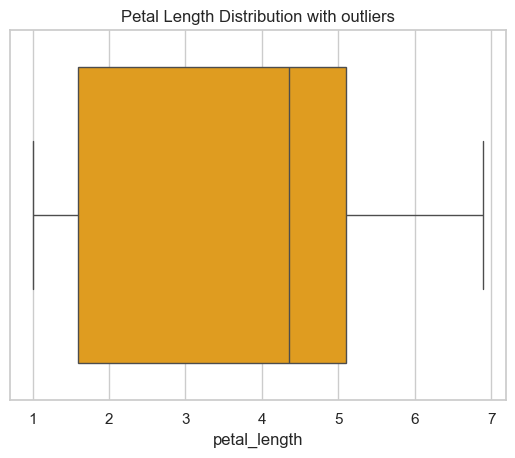

In [10]:
#Histogram:Sepal Length
sns.histplot(df['sepal_length'],bins=20,kde=True,color='skyblue')
plt.title("Sepal Length Distribution")
plt.show()

# Boxplot:Petal Length
sns.boxplot(x=df['petal_length'],color='orange')
plt.title("Petal Length Distribution with outliers")
plt.show()

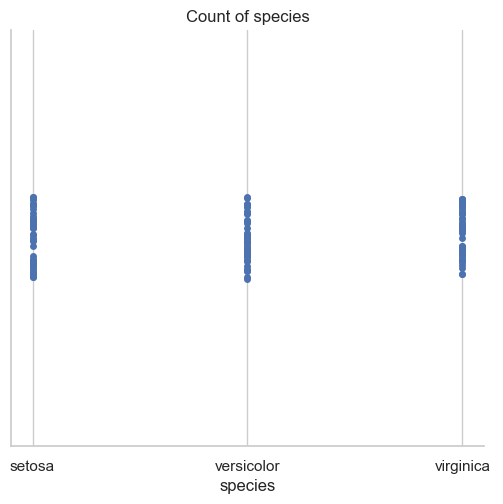

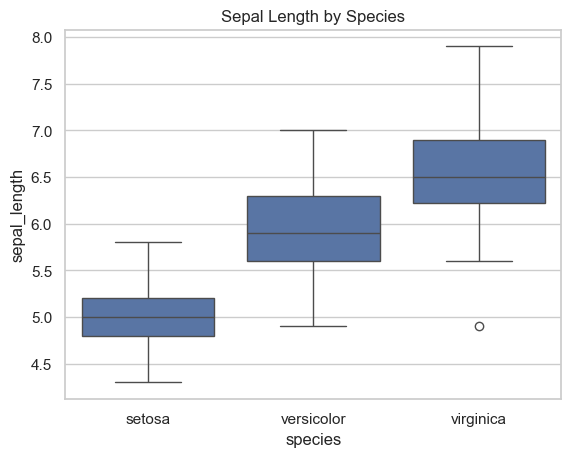

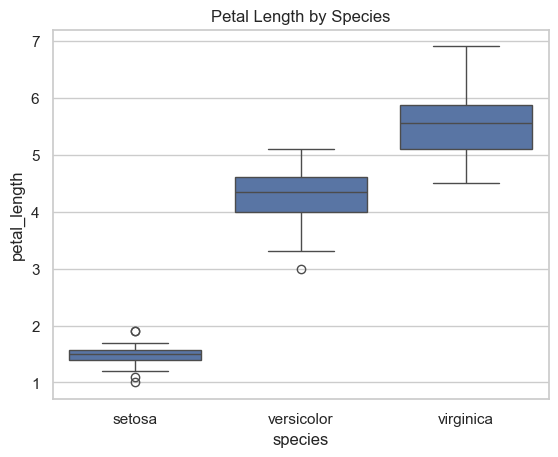

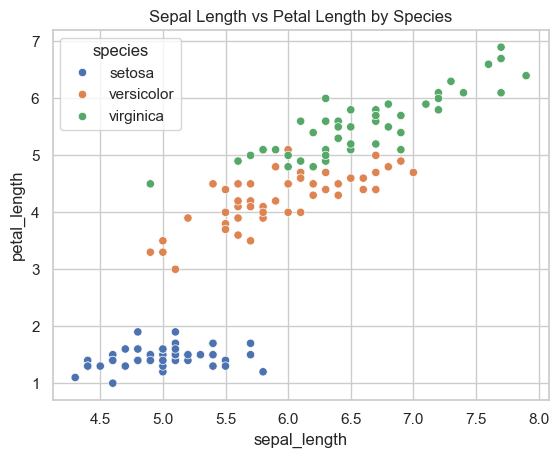

In [12]:
# Univariate Analysis-Categorical Features
cat_cols=df.select_dtypes("category").columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()

### Bivariate Analysis- Numerical vs Categorical
sns.boxplot(x='species',y='sepal_length',data=df)
plt.title("Sepal Length by Species")
plt.show()

sns.boxplot(x='species',y='petal_length',data=df)
plt.title("Petal Length by Species")
plt.show()

sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=df)
plt.title("Sepal Length vs Petal Length by Species")
plt.show()

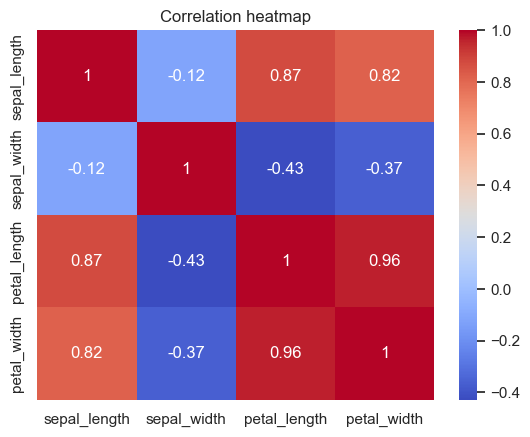

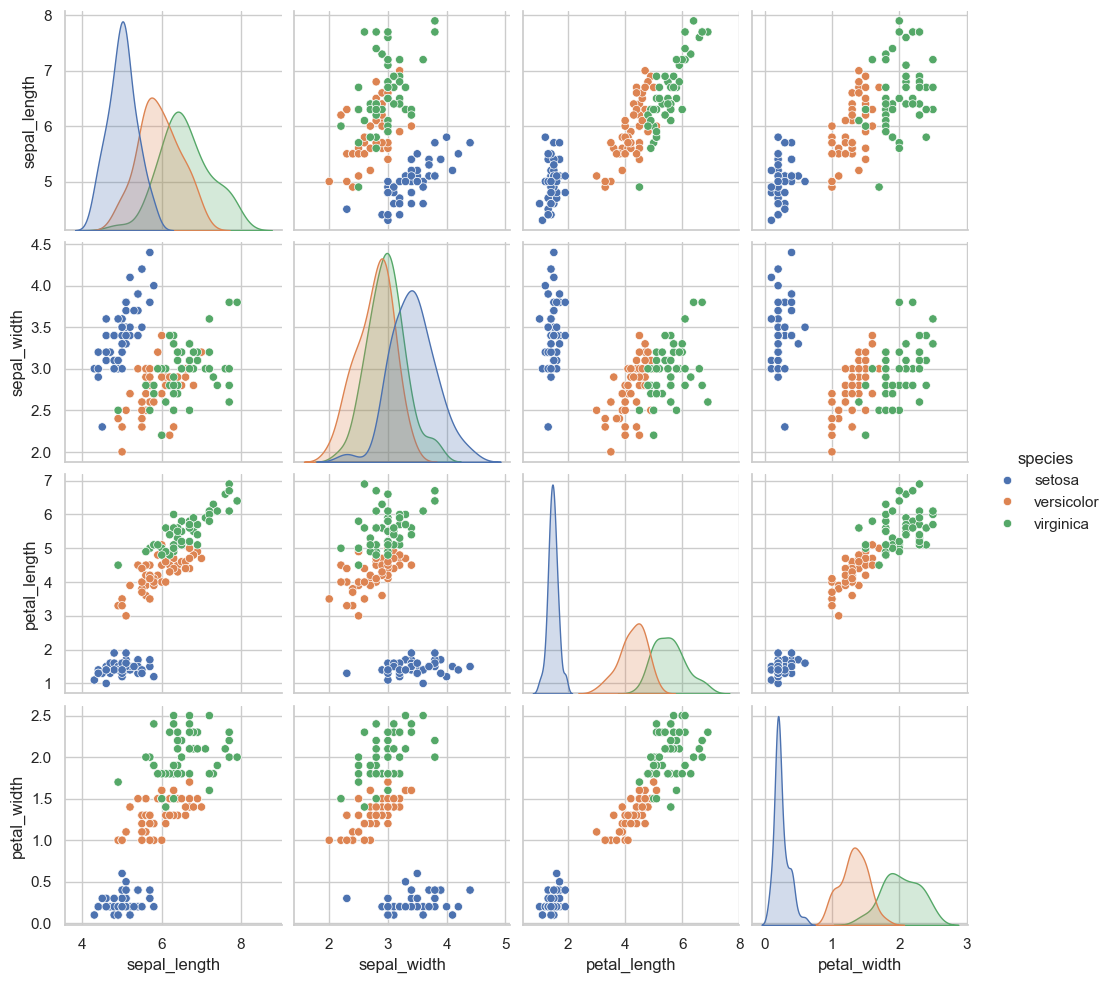

In [13]:
### Corelation and Multivariate Analysis
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

sns.pairplot(df,hue='species')
plt.show()

#### Insights:
#### 1. Petal length and width are strongly correlated.
#### 2. Petal size is a strong differentiator between species.

### Outlier Detection using IQR

In [14]:
for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=df[(df[col]<lower)|(df[col]>upper)]
    print(f"Number of outliers in {col}:",len(outliers))

Number of outliers in sepal_length: 0
Number of outliers in sepal_width: 4
Number of outliers in petal_length: 0
Number of outliers in petal_width: 0


### Outlier Treatment (Capping)

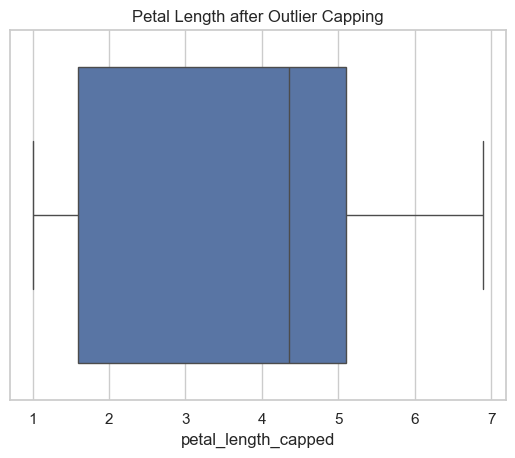

In [15]:
for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[col+'_capped']=df[col].clip(lower,upper)

sns.boxplot(x=df['petal_length_capped'])
plt.title("Petal Length after Outlier Capping")
plt.show()

### Feature Engineering

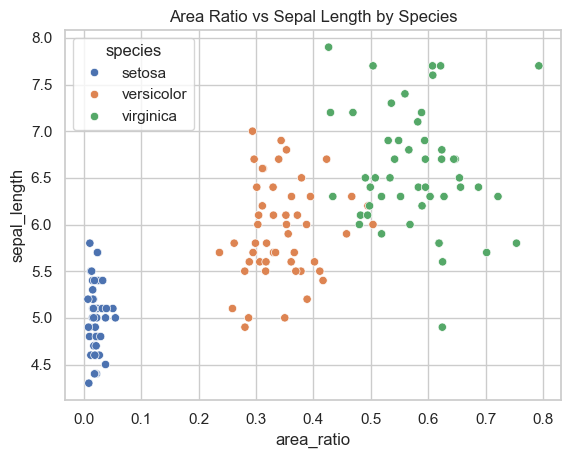

,sepal_area,petal_area,area_ratio
0,17.85,0.28,0.015686
1,14.70,0.28,0.019048
2,15.04,0.26,0.017287
3,14.26,0.30,0.021038
4,18.00,0.28,0.015556


In [16]:
df['sepal_area']=df['sepal_length']*df['sepal_width']
df['petal_area']=df['petal_length']*df['petal_width']
df['area_ratio']=df['petal_area']/df['sepal_area']

sns.scatterplot(x='area_ratio',y='sepal_length',hue='species',data=df)
plt.title("Area Ratio vs Sepal Length by Species")
plt.show()

df[['sepal_area','petal_area','area_ratio']].head()

### Insights:
#### 1. Petal size strongly correlates with species type.
#### 2. Setosa species has smaller petals and sepals compared to others.
#### 3. New features like area ratio can improve model accuracy.

### Export the cleaned data

In [17]:
df.to_csv("Iris_cleaned.csv",index=False)
print("\n Cleaned Iris data saved as Iris_cleaned.csv")

import os
print(os.getcwd())


 Cleaned Iris data saved as Iris_cleaned.csv
c:\Users\Divya\Desktop\Tekworks
